In [1]:
import pandas as pd  
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,-0.004914,NaN,-0.013479,-0.013647,-0.003569,0.002294,0.086642,0.032588,-0.024174,-0.024201,...,0.220839,0.225791,0.245757,0.202230,0.387722,1.000000,0.496678,0.254418,0.270380,0.187921
Q038,0.003906,NaN,-0.032710,-0.032467,-0.035306,-0.014725,0.069298,0.024112,-0.038666,-0.038305,...,0.159887,0.223508,0.215767,0.142610,0.378421,0.496678,1.000000,0.374424,0.259947,0.219529
Q039,0.001002,NaN,-0.094862,-0.094113,-0.069973,-0.066346,0.046830,0.011327,-0.097273,-0.096666,...,0.144264,0.206979,0.189252,0.225724,0.270343,0.254418,0.374424,1.000000,0.305357,0.262031
Q040,-0.010967,NaN,-0.077456,-0.076838,-0.010988,-0.022736,0.053556,0.014847,-0.081490,-0.080963,...,0.215292,0.176028,0.243190,0.179292,0.177025,0.270380,0.259947,0.305357,1.000000,0.306438


In [6]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']
features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [7]:
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

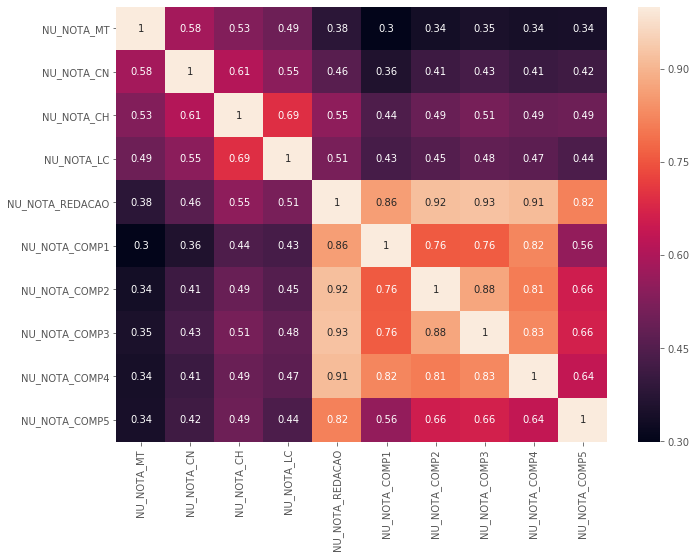

In [8]:
corr = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

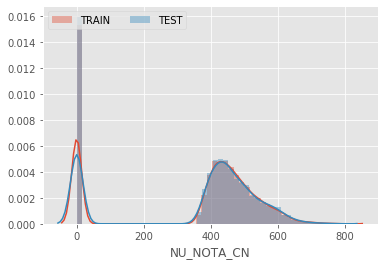

In [9]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [10]:
# Seleciona somente linhas com valores nesses 4 quesitos a baixo na base de train
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

In [11]:
df_train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [12]:
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]

In [13]:
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

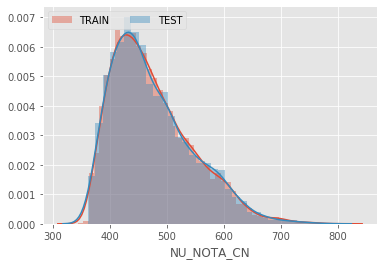

In [14]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [15]:
df_test['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

In [16]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

In [18]:
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [19]:
y_pred_test = regressor.predict(x_test)

In [20]:
y_pred_train = regressor.predict(x_train)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 53.31348913
MSE: 4678.43225585
RMSE: 68.39906619


In [22]:
df_train['NU_INSCRICAO'].count()

9852

In [23]:
df_test['NU_INSCRICAO'].count()

3286

In [24]:
len(y_pred_train)

9852

In [25]:
len(y_pred_test)

3286

In [35]:
df_test['NU_INSCRICAO']

0       73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1       71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2       b38a03232f43b11c9d0788abaf060f7366053b6d
4       715494628a50142ce8cb17191cfe6d0f3cae0934
5       e656d6bad65c93fb2880f1eba5037008c8e75774
                          ...                   
4570    13aaf6335f43cfc1b8baeac559324f20b2653724
4571    dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b
4572    a75fa8770257e7c9368d059fe53d9ef431f4bdef
4573    655fa6306720ff16e825903b5422a46608a77545
4574    1f4bc3e3d56212d500625bfe8ac78ccff4362293
Name: NU_INSCRICAO, Length: 3286, dtype: object

In [92]:
df_answer = pd.DataFrame(df_test['NU_INSCRICAO'])

In [95]:
df_answer.reset_index(drop=True, inplace=True)

In [96]:
df_answer

,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
3,715494628a50142ce8cb17191cfe6d0f3cae0934
4,e656d6bad65c93fb2880f1eba5037008c8e75774
...,...
3281,13aaf6335f43cfc1b8baeac559324f20b2653724
3282,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b
3283,a75fa8770257e7c9368d059fe53d9ef431f4bdef
3284,655fa6306720ff16e825903b5422a46608a77545


In [97]:
df_answer_y = pd.DataFrame(y_pred_test, columns=['NU_NOTA_MT'])

In [98]:
df_answer_y

,NU_NOTA_MT
0,417.6684
1,442.1140
2,591.9343
3,506.7389
4,467.0751
...,...
3281,511.9339
3282,445.4127
3283,470.5929
3284,696.6326


In [99]:
df_final =  pd.concat([df_answer, df_answer_y], axis=1, sort=False)

In [100]:
df_final

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,417.6684
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.1140
2,b38a03232f43b11c9d0788abaf060f7366053b6d,591.9343
3,715494628a50142ce8cb17191cfe6d0f3cae0934,506.7389
4,e656d6bad65c93fb2880f1eba5037008c8e75774,467.0751
...,...,...
3281,13aaf6335f43cfc1b8baeac559324f20b2653724,511.9339
3282,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,445.4127
3283,a75fa8770257e7c9368d059fe53d9ef431f4bdef,470.5929
3284,655fa6306720ff16e825903b5422a46608a77545,696.6326


In [103]:
df_final.to_csv('answer.csv', index=False, header=True)